<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Correlation_Calculation_Gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [52]:
data = pd.read_csv('/content/MCX_GOLD1!, 1D.csv')

In [53]:
import datetime
data['date']=data.time.apply(lambda d: datetime.datetime.fromtimestamp(int(d)).strftime('%d-%m-%Y'))

In [54]:
data.tail(2)

,time,open,high,low,close,"NIFTY, NSE: Open","NIFTY, NSE: High","NIFTY, NSE: Low","NIFTY, NSE: Close",Volume,Volume MA,date
1597,1627615800,48281,48304,47751,47846,15800.6,15862.8,15744.85,15763.05,1546,6789.1,30-07-2021
1598,1627875000,47951,48150,47816,48086,15874.9,15892.9,15834.65,15885.15,5348,6885.2,02-08-2021


In [55]:
del data['time']

In [56]:
data= data.set_index('date')

In [57]:
data.tail(5)

,open,high,low,close,"NIFTY, NSE: Open","NIFTY, NSE: High","NIFTY, NSE: Low","NIFTY, NSE: Close",Volume,Volume MA
date,,,,,,,,,,
27-07-2021,47446,47642,47367,47573,15860.50,15881.55,15701.00,15746.45,7103,7192.95
28-07-2021,47610,47689,47470,47577,15761.55,15767.50,15513.45,15709.40,4486,7099.90
29-07-2021,47720,48310,47690,48281,15762.70,15817.35,15737.80,15778.45,5823,7076.10
30-07-2021,48281,48304,47751,47846,15800.60,15862.80,15744.85,15763.05,1546,6789.10
02-08-2021,47951,48150,47816,48086,15874.90,15892.90,15834.65,15885.15,5348,6885.20


In [58]:
data_subset = data[['close','NIFTY, NSE: Close']]

In [59]:
data_subset.tail(2)

,close,"NIFTY, NSE: Close"
date,,
30-07-2021,47846,15763.05
02-08-2021,48086,15885.15


In [60]:
data_subset.columns=['close_crude','close_nifty']

In [61]:
data_subset['close_percent_crude']=data_subset['close_crude'].pct_change(60)
data_subset['close_percent_nifty']=data_subset['close_nifty'].pct_change(60)

In [62]:
data_subset.dropna(inplace=True)

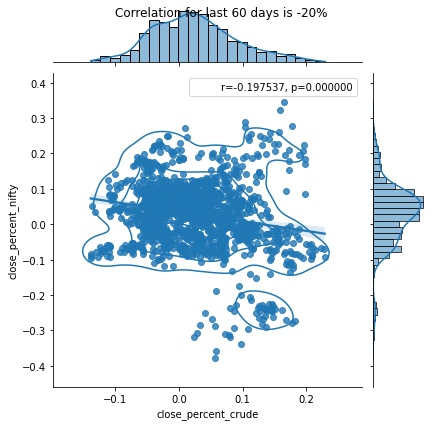

In [63]:
g=sns.jointplot(x='close_percent_crude',y='close_percent_nifty',data=data_subset,kind='reg').plot_joint(sns.kdeplot,n_levels=6)
r, p = pearsonr(data_subset['close_percent_crude'], data_subset['close_percent_nifty'])
phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.suptitle(f'Correlation for last 60 days is {round(r*100)}%')
plt.show()